Processing Iris dataset...


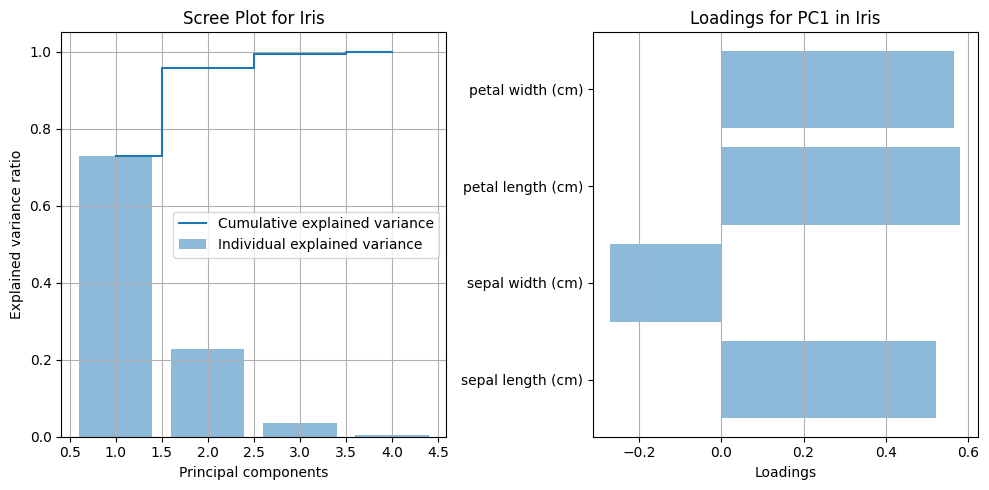

Processing Wine dataset...


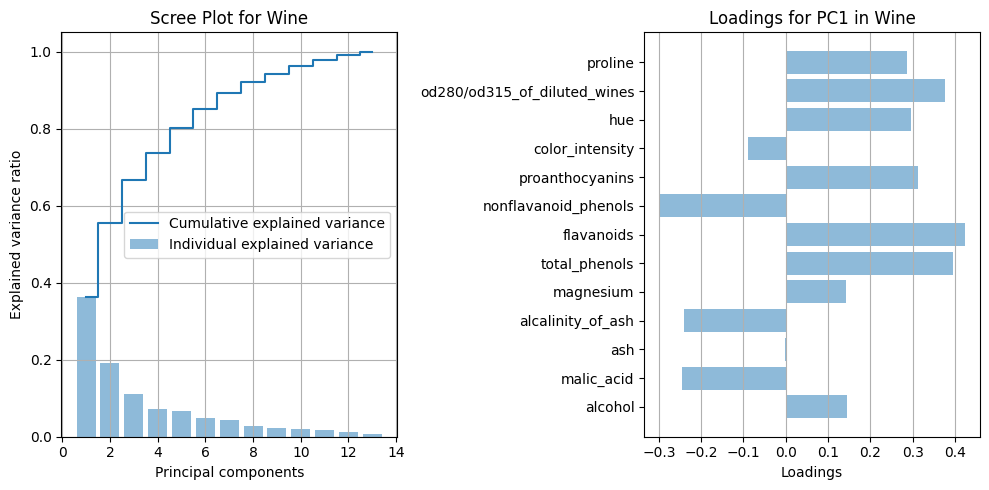

Processing Breast Cancer dataset...


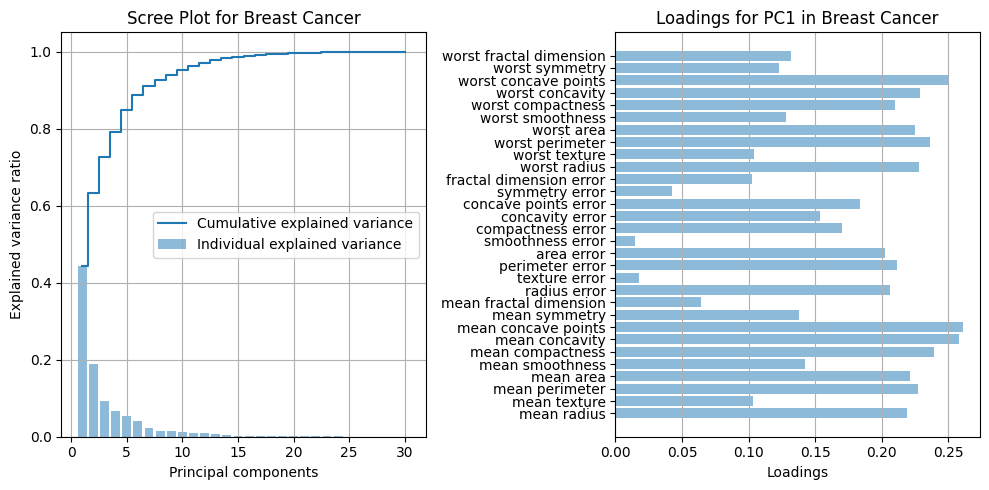

Processing Diabetes dataset...


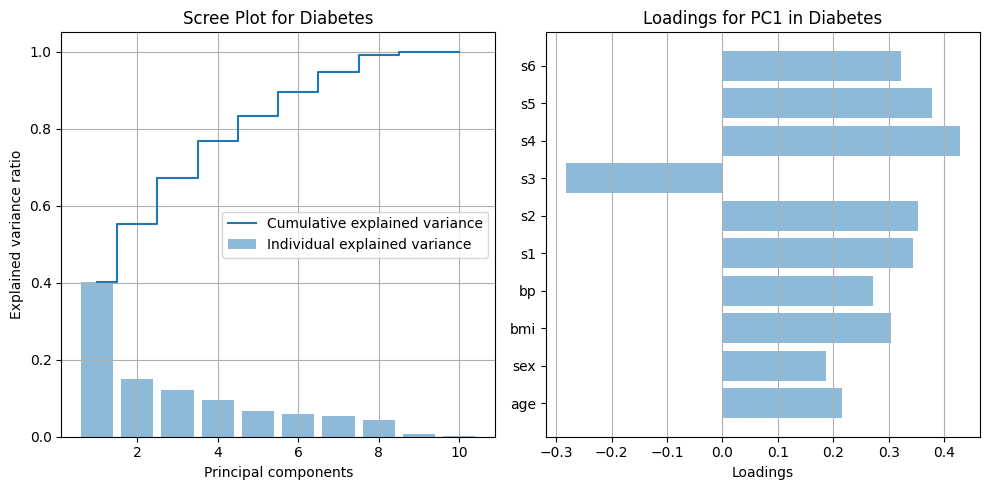

Processing Linnerud dataset...


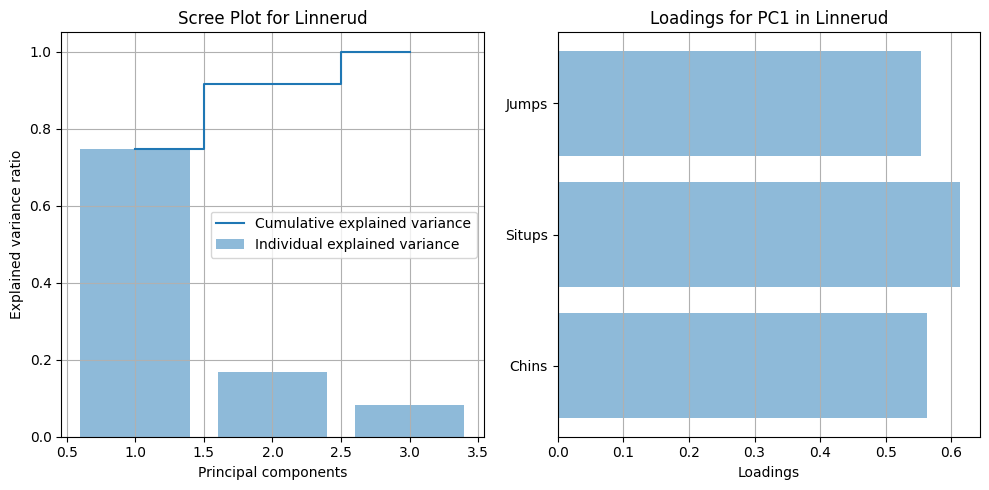

Processing Breast Cancer 2 dataset...


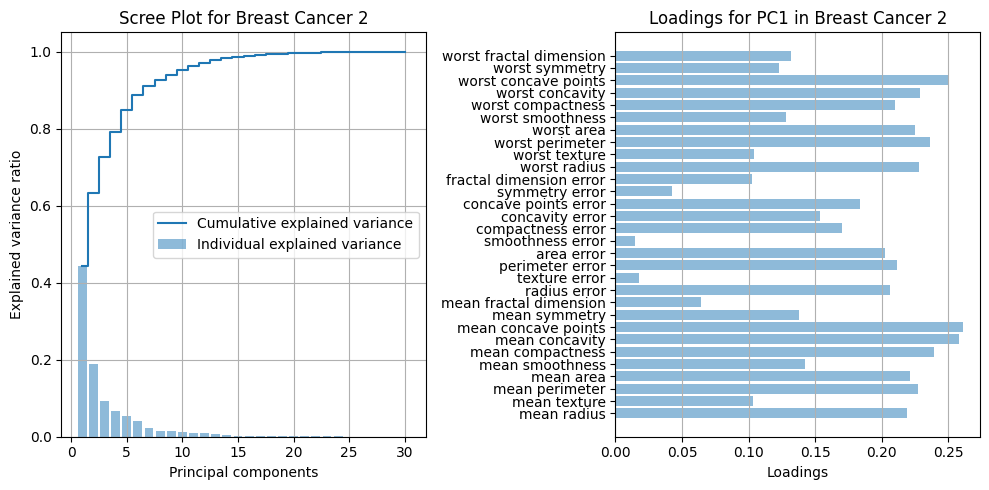

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import (load_iris, load_wine, load_breast_cancer,
                              load_diabetes, load_linnerud,
                              load_breast_cancer)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

datasets = {
    'Iris': load_iris(),
    'Wine': load_wine(),
    'Breast Cancer': load_breast_cancer(),
    'Diabetes': load_diabetes(),
    'Linnerud': load_linnerud(),
    'Breast Cancer 2': load_breast_cancer()
}

for name, data in datasets.items():
    print(f"Processing {name} dataset...")

    X = data.data
    feature_names = data.feature_names if hasattr(data, 'feature_names') else [f'Feature_{i}' for i in range(X.shape[1])]

    # Standardize the data
    X_scaled = StandardScaler().fit_transform(X)

    # Apply PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Scree plot
    explained_variances = pca.explained_variance_ratio_
    components = np.arange(1, len(explained_variances) + 1)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Scree Plot
    axes[0].bar(components, explained_variances, alpha=0.5, align='center', label='Individual explained variance')
    axes[0].step(components, np.cumsum(explained_variances), where='mid', label='Cumulative explained variance')
    axes[0].set_ylabel('Explained variance ratio')
    axes[0].set_xlabel('Principal components')
    axes[0].set_title(f'Scree Plot for {name}')
    axes[0].legend(loc='best')
    axes[0].grid()

    # Loadings for PC1
    pc1_loadings = pca.components_[0]
    axes[1].barh(feature_names, pc1_loadings, alpha=0.5)
    axes[1].set_xlabel('Loadings')
    axes[1].set_title(f'Loadings for PC1 in {name}')
    axes[1].grid(axis='x')

    plt.tight_layout()
    plt.show()


## Assumptions of PCA

Principal Component Analysis (PCA) is a widely used technique for dimensionality reduction and data visualization. Like many statistical techniques, PCA comes with its set of assumptions:

1. **Linearity:** PCA assumes that the relationship between variables is linear. If relationships are highly nonlinear, PCA might not provide meaningful results, and other nonlinear dimensionality reduction techniques might be more appropriate.

2. **Large variances correspond to important features:** PCA works by capturing the directions (principal components) that maximize variance. It assumes that features with higher variance are more informative and should be given more weight in representing the data.

3. **Orthogonality:** Principal components are orthogonal to each other. This means they are uncorrelated. This assumption ensures that each principal component captures a unique aspect of the data and doesn't overlap with others.

4. **Variance is a meaningful measure of importance:** PCA assumes that variance indicates the importance of the features. However, this might not always be the case. In some scenarios, other measures of importance might be more relevant.

5. **Standardization:** Often, PCA assumes that the features are standardized (i.e., have a mean of 0 and a standard deviation of 1). If features are not standardized, variables with larger scales might dominate the principal components.

6. **Data is well-represented in lower dimensions:** PCA assumes that the data's structure can be effectively captured in a lower-dimensional space. While this often holds true for many datasets, in some cases, crucial information might be lost when reducing dimensions.

7. **Presence of principal components:** For PCA to be effective, there should be significant variability in the dataset. If all variables are almost constant, there will be little variation to capture, making PCA less informative.

8. **Independence of errors:** If you're using PCA as a pre-processing step for a subsequent analysis (e.g., regression), it's crucial to ensure that the errors (residuals) resulting from the subsequent analysis are independent of each other. Violation of this assumption can lead to biased estimates.

While these assumptions provide a foundation for applying PCA, it's essential to understand your data and the context in which you're using PCA. Depending on the application and dataset, you might need to adjust or consider alternative techniques if these assumptions are not met.